In [1]:
import numpy as np
import matplotlib.pyplot as plt
import joblib

In [2]:
k_="exp"
nx = 127
ellx = 1
variance = 1.0
num_samples = 1000
path1 = "MC_samples_u_fipy_"+\
            k_+"_nx="+str(nx)+\
            "_lx="+str(ellx)+\
            "_v="+str(variance)+\
            "_num_samples="+str(num_samples)+".npy"


path3 = "MC_samples_inputfield_wBoundary_"+\
            k_+"_nx="+str(nx)+\
            "_lx="+str(ellx)+\
            "_v="+str(variance)+\
            "_num_samples="+str(num_samples)+".npy"


path2 ="MC_samples_inputfield_"+\
            k_+"_nx="+str(nx)+\
            "_lx="+str(ellx)+\
            "_v="+str(variance)+\
            "_num_samples="+str(num_samples)+".npy"

cellcenters_nx = np.load("coordinates_nx="+str(nx)+".npy")
cellcenters_nx = np.concatenate((np.zeros((1,1)),cellcenters_nx,np.ones((1,1))))
np.save('coordinates_nx='+str(cellcenters_nx.shape[0])+'.npy', cellcenters_nx)

trainDataInputfield= np.load(path3)
trainDataU = np.load(path1)

trainDataU = np.concatenate((np.ones((trainDataU.shape[0],1)),trainDataU,np.zeros((trainDataU.shape[0],1))),axis=1)

In [3]:
print(trainDataInputfield.shape)
print(cellcenters_nx.shape)
print(trainDataU.shape)

(1000, 129)
(129, 1)
(1000, 129)


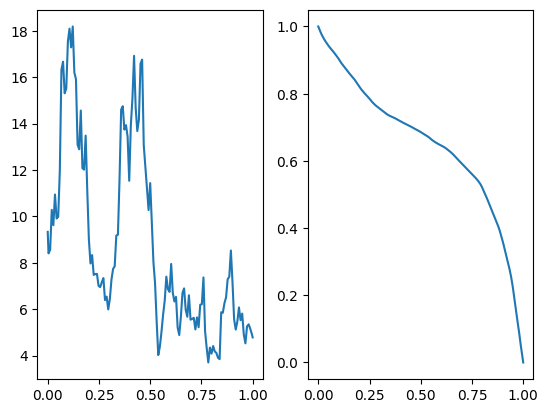

In [4]:
index = 6
plt.subplot(121)
plt.plot(cellcenters_nx,trainDataInputfield[index,:])
plt.subplot(122)

# plt.plot(cellcenters_nx,np.concatenate((np.ones((1)),trainDataU[0,:],np.zeros((1)))))
plt.plot(cellcenters_nx,trainDataU[0,:])


plt.show()


# 添加边界条件

In [ ]:
# left_boundary = np.ones((num_samples,1))
# right_boundary = np.zeros((num_samples,1))
# DataU = np.concatenate([left_boundary,trainDataU,right_boundary],axis=1)   
DataU  = trainDataU
DataInputfield = trainDataInputfield
coordinates_inputfield = cellcenters_nx  
coordinates_ouput = cellcenters_nx 
print(coordinates_ouput.shape)
# coordinates_ouput= np.concatenate([np.zeros((1,1)),cellcenters_nx,np.ones((1,1))]) 

(129, 1)


In [ ]:
joblib.dump(coordinates_inputfield,"coordinates_inputfield.pkl") 
joblib.dump(coordinates_ouput,"coordinates_output.pkl")

['coordinates_output.pkl']

# 制作训练数据集

In [7]:
# DataU = np.concatenate((np.ones((DataU.shape[0],1)),DataU,np.zeros((trainDataU.shape[0],1))),axis=1)

In [8]:
allNum = DataInputfield.shape[0]
print(allNum)
trainNumExamples,valNumExamples, = int(allNum*0.6),int(allNum*0.2)

TrainData={}
TrainData['coeff'] = DataInputfield[:trainNumExamples,:]
TrainData['sol'] = DataU[:trainNumExamples,:]

ValData={}
ValData['coeff'] = DataInputfield[trainNumExamples:(trainNumExamples+valNumExamples),:]
ValData['sol'] = DataU[trainNumExamples:(trainNumExamples+valNumExamples),:]

TestData={}
TestData['coeff'] = DataInputfield[(trainNumExamples+valNumExamples):,:]
TestData['sol'] = DataU[(trainNumExamples+valNumExamples):,:]

1000


In [9]:
joblib.dump(TrainData,"TrainData.pkl")
joblib.dump(ValData,"ValData.pkl")
joblib.dump(TestData,"TestData.pkl")

['TestData.pkl']